In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow as tf

In [ ]:
train_path_normal="drive/My Drive/chest_xray/train/NORMAL"
train_path_pnemonia="drive/My Drive/chest_xray/train/PNEUMONIA"

test_path_normal="drive/My Drive/chest_xray/test/NORMAL"
test_path_pnemonia="drive/My Drive/chest_xray/test/PNEUMONIA"

In [ ]:
temp=os.listdir(train_path_pnemonia)
print(temp)

['person531_bacteria_2239.jpeg', 'person596_bacteria_2445.jpeg', 'person579_bacteria_2382.jpeg', 'person596_bacteria_2447.jpeg', 'person585_virus_1129.jpeg', 'person558_bacteria_2328.jpeg', 'person581_virus_1125.jpeg', 'person543_bacteria_2279.jpeg', 'person570_bacteria_2365.jpeg', 'person579_bacteria_2384.jpeg', 'person564_bacteria_2345.jpeg', 'person536_bacteria_2257.jpeg', 'person531_bacteria_2238.jpeg', 'person59_bacteria_284.jpeg', 'person529_bacteria_2228.jpeg', 'person534_virus_1061.jpeg', 'person55_bacteria_260.jpeg', 'person543_bacteria_2284.jpeg', 'person574_bacteria_2373.jpeg', 'person537_bacteria_2266.jpeg', 'person562_virus_1102.jpeg', 'person537_virus_1067.jpeg', 'person599_virus_1155.jpeg', 'person600_bacteria_2456.jpeg', 'person554_bacteria_2323.jpeg', 'person579_bacteria_2381.jpeg', 'person599_bacteria_2455.jpeg', 'person544_virus_1075.jpeg', 'person597_bacteria_2451.jpeg', 'person567_bacteria_2353.jpeg', 'person529_virus_1050.jpeg', 'person543_virus_1073.jpeg', 'perso

In [ ]:
print('total training normal images:', len(os.listdir(train_path_normal)))
print('total training pnemonia images:', len(os.listdir(train_path_pnemonia)))

total training normal images: 1341
total training pnemonia images: 3875


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    'drive/My Drive/chest_xray/train',
    target_size=(150,150),
    batch_size = 128,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'drive/My Drive/chest_xray/test',
    target_size=(150,150),
    batch_size = 128,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               21234176  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr=0.001),
    metrics = ['acc']
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

warnings ignored


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data = test_generator,
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
41/41 [==============================] - 156s 4s/step - loss: 0.6696 - acc: 0.8269 - val_loss: 1.2336 - val_acc: 0.6506
Epoch 2/15
41/41 [==============================] - 149s 4s/step - loss: 0.1869 - acc: 0.9321 - val_loss: 1.1654 - val_acc: 0.7131
Epoch 3/15
41/41 [==============================] - 153s 4s/step - loss: 0.1451 - acc: 0.9480 - val_loss: 0.7372 - val_acc: 0.7804
Epoch 4/15
41/41 [==============================] - 150s 4s/step - loss: 0.1436 - acc: 0.9576 - val_loss: 0.7619 - val_acc: 0.7772
Epoch 5/15
41/41 [==============================] - 152s 4s/step - loss: 0.0694 - acc: 0.9766 - val_loss: 1.2178 - val_acc: 0.7436
Epoch 6/15
41/41 [==============================] - 150s 4s/step - loss: 0.0774 - acc: 0.9720 - val_loss: 0.8541 - val_acc: 0.7965
Epoch 7/15
41/41 [==============================] - 155s 4s/step - loss: 0.0902 - acc: 0.9749 - val_loss: 1.2454 - val_acc: 0.7612
Epoch 8

<Figure size 432x288 with 0 Axes>

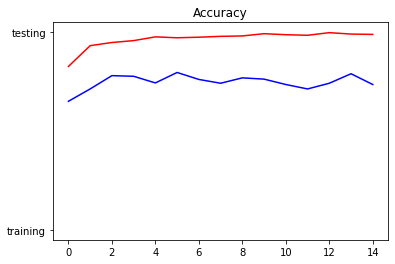

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',"training")
plt.plot(epochs,val_acc,'b','testing')
plt.title('Accuracy')
plt.figure()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = "/content/"+fn
  img = image.load_img(path,target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])

Saving person1954_bacteria_4886.jpeg to person1954_bacteria_4886 (1).jpeg
Saving person1952_bacteria_4883.jpeg to person1952_bacteria_4883.jpeg
Saving person1951_bacteria_4882.jpeg to person1951_bacteria_4882.jpeg
Saving person1950_bacteria_4881.jpeg to person1950_bacteria_4881.jpeg
Saving person1949_bacteria_4880.jpeg to person1949_bacteria_4880.jpeg
Saving person1947_bacteria_4876.jpeg to person1947_bacteria_4876.jpeg
Saving person1946_bacteria_4875.jpeg to person1946_bacteria_4875.jpeg
Saving person1946_bacteria_4874.jpeg to person1946_bacteria_4874.jpeg
Saving NORMAL2-IM-1442-0001.jpeg to NORMAL2-IM-1442-0001.jpeg
Saving NORMAL2-IM-1440-0001.jpeg to NORMAL2-IM-1440-0001 (5).jpeg
Saving NORMAL2-IM-1438-0001.jpeg to NORMAL2-IM-1438-0001.jpeg
Saving NORMAL2-IM-1437-0001.jpeg to NORMAL2-IM-1437-0001.jpeg
Saving NORMAL2-IM-1436-0001.jpeg to NORMAL2-IM-1436-0001.jpeg
Saving NORMAL2-IM-1431-0001.jpeg to NORMAL2-IM-1431-0001.jpeg
Saving NORMAL2-IM-1430-0001.jpeg to NORMAL2-IM-1430-0001.jpe